In [101]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [102]:
train = pd.read_csv('../../data/profile_data_train.csv')
test = pd.read_csv('../../data/profile_data_test.csv')

In [103]:
X_train = train.drop('tweets_text', axis=1)
X_train = X_train.drop('Unnamed: 0', axis=1)
X_train = X_train.drop('age_group', axis = 1)
X_train = X_train.drop('handle', axis=1)
X_train = X_train.drop('hashtags', axis=1)
y_train = train['age_group']
X_test = test.drop('tweets_text', axis=1)
X_test = X_test.drop('Unnamed: 0', axis=1)
X_test = X_test.drop('age_group', axis=1)
X_test = X_test.drop('handle', axis=1)
X_test = X_test.drop('hashtags', axis=1)
y_test = test['age_group']

In [104]:
y_train.max

<bound method Series.max of 0       2
1       1
2       0
3       0
4       0
       ..
1694    0
1695    0
1696    1
1697    1
1698    3
Name: age_group, Length: 1699, dtype: int64>

In [105]:
print(y_train.max())
print(y_test.max())

3
3


In [106]:
X_train.head()

,followers,following,follower_following_ratio,avg_favorites,min_favorites,max_favorites,avg_retweets,min_retweets,max_retweets,hashtags_per_tweet,mentions_per_tweet,avg_timedelta_hrs,avg_word_count
0,1634.0,1091.0,1.497709,1.6,0.0,4.0,0.2,0.0,1.0,0.0,0.100,0.061759,231
1,733157.0,66.0,11108.439394,7100.2,13.0,45233.0,248.6,0.0,1597.0,0.1,0.000,85.179506,54
2,14396.0,57.0,252.561404,63.5,1.0,131.0,33.5,1.0,89.0,0.0,0.000,35.935463,21
3,465.0,389.0,1.195373,2.3,0.0,16.0,0.1,0.0,1.0,0.0,0.000,17.931512,37
4,32.0,27.0,1.185185,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.125,975.307540,36


In [107]:
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

In [108]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
# skopt_grid = {
#     'max_depth': (4, 12),
#     'learning_rate': (0.01, 0.5), 
#     'n_estimators': (20, 1000), 
#     'gamma': (0, 0.5), 
#     'min_child_weight': (1, 5),
#     'subsample': (0.1, 1),
#     'colsample_bytree': (0.1, 1)}

skopt_grid  = [Integer(3, 20, name='max_depth'),
          Real(0.01,0.1, "log-uniform", name='learning_rate'),
          Integer(1, 5, name='min_child_weight'),
          Integer(20, 1000, name='n_estimators'),
          Real(0,5, name='gamma'),
          Real(0.1, 1.0, name='subsample'),
          Real(0.1, 1.0, name='colsample_bytree'),
          Real(0, 1, name='scale_pos_weight')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(skopt_grid)
def objective(**params):
    clf.set_params(**params)

    return -np.mean(cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="accuracy"))

In [109]:
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score

res_gp = gp_minimize(objective, skopt_grid, n_calls=100, random_state=0, verbose=True)

"Best score=%.4f" % res_gp.fun

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 20.5187
Function value obtained: -0.4744
Current minimum: -0.4744
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 11.5493
Function value obtained: -0.4791
Current minimum: -0.4791
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 34.9845
Function value obtained: -0.4703
Current minimum: -0.4791
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 25.2675
Function value obtained: -0.4602
Current minimum: -0.4791
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 5.9001
Function value obtained: -0.4820
Current minimum: -0.4820
Iteration No: 6 start

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 7.5339
Function value obtained: -0.4773
Current minimum: -0.4832
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 83.6858
Function value obtained: -0.4779
Current minimum: -0.4832
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 10.7818
Function value obtained: -0.4797
Current minimum: -0.4832
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.8408
Function value obtained: -0.4650
Current minimum: -0.4832
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 13.8620
Function value obtained: -0.4826
Current minimum: -0.4832
Iteration No: 46

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 16.0976
Function value obtained: -0.4797
Current minimum: -0.4903
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 2.5314
Function value obtained: -0.4650
Current minimum: -0.4903
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 27.5948
Function value obtained: -0.4738
Current minimum: -0.4903
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 19.0805
Function value obtained: -0.4709
Current minimum: -0.4903
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 17.9630
Function value obtained: -0.4779
Current minimum: -0.4903
Iteration No: 8

'Best score=-0.4903'

In [110]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.100f
- min_child_weight=%d
- n_estimators=%d
- gamma=%.100f
- subsample=%.1000f
- colsample_bytree=%.100f
- scale_pos_weight=%.100f""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5],
                            res_gp.x[6], res_gp.x[7],
                         ))

Best parameters:
- max_depth=3
- learning_rate=0.0126246321226801804654682470641091640572994947433471679687500000000000000000000000000000000000000000
- min_child_weight=1
- n_estimators=939
- gamma=0.3206392650848450265321787355787819251418113708496093750000000000000000000000000000000000000000000000
- subsample=0.3349080948725847162172897242271574214100837707519531250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

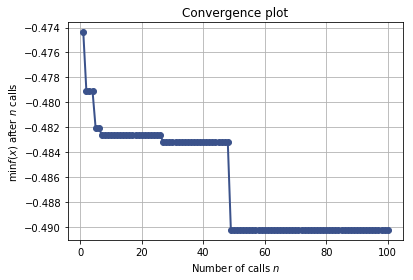

In [112]:
from skopt.plots import plot_convergence
import matplotlib
plot_convergence(res_gp)

In [113]:
scikitopt_model = xgb.XGBClassifier(max_depth=3,
                          learning_rate=0.01262463212268018046546824706410916405729949474334716796875,
                          min_child_weight=1,
                          n_estimators=939,
                          gamma=0.320639265084845026532178735578781925141811370849609375,
                          subsample=0.334908094872584716217289724227157421410083770751953125,
                          colsample_bytree=0.16458578856928951505977920533041469752788543701171875,
                          scale_pos_weight=0.4330093208520156000673750895657576620578765869140625)

In [114]:
scikitopt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.16458578856928952,
              gamma=0.320639265084845, learning_rate=0.01262463212268018,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=939, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.4330093208520156, seed=None,
              silent=None, subsample=0.3349080948725847, verbosity=1)

In [119]:
preds = scikitopt_model.predict(X_test)
score = accuracy_score(y_test, preds)

In [120]:
print(score)

0.48470588235294115


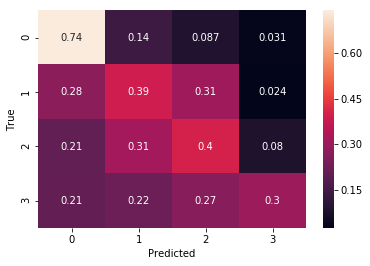

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds, normalize='true')
df_cm = pd.DataFrame(cm, range(4), range(4))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()